In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Reading file in Jupyter 

In [27]:
df = pd.read_csv("./Toyota.csv",index_col=0)

Another method to create a Dataframe 


In [28]:
df1 = pd.DataFrame(df)

Checking dTypes for the df1

In [29]:
df1.dtypes

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

np.unique() in df1 changing numeric columns showing dtypes = category into int64 

In [30]:
print(np.unique(df1["KM"]))
print(np.unique(df1["Age"]))
print(np.unique(df1["MetColor"]))
print(np.unique(df1["HP"]))


['1' '10000' '100123' ... '99865' '99971' '??']
[ 1.  2.  4.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75.
 76. 77. 78. 79. 80. nan]
[ 0.  1. nan]
['107' '110' '116' '192' '69' '71' '72' '73' '86' '90' '97' '98' '????']


removing garbage values - ??, ???? at the time of opening file


In [31]:
df = pd.read_csv("./Toyota.csv",index_col=0,na_values=['??','????'])


creating deep copy of dataframe

In [32]:
df1=df.copy(deep=True)

changing dtypes in metColor

In [33]:
np.unique(df1["MetColor"])

df1["MetColor"].replace("0.",0 ,inplace=True)
df1["MetColor"].replace(1.,1 ,inplace=True )

# df1["MetColor"] = df1["MetColor"].astype("object")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


Checking unique values for Age

In [34]:
np.unique(df1["Age"])
# df1["Age"] = df1["Age"].astype("int64")

array([ 1.,  2.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., nan])

Filling null values for columns Age, Metcolor, KM therefore checking total nulll values in all columns

In [35]:
df1.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

creating missing dataframe 

In [36]:
missing  = df1[df1.isnull().any(axis=1)]
missing

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105
15,22000,28.0,18739.0,Petrol,NaN,0.0,0,1800,3,1185
...,...,...,...,...,...,...,...,...,...,...
1428,8450,72.0,NaN,Petrol,86.0,NaN,0,1300,3,1015
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015


Gettting mean values to replace null values with them 

In [37]:
df1.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


copying mean of Numeric columns and replacing them with null values  

In [38]:
mean  = df1["Age"].mean()
df1["Age"].fillna(df1["Age"].mean(),inplace=True)

# similarly for HP
df1["HP"].fillna(df1["HP"].mean(),inplace=True)

Cheecking null values

In [39]:
df1.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

for KM replacing null vaules with median values 

In [40]:
df1["KM"].fillna(df1["KM"].median(),inplace=True)

Checking everything Once Again 

In [41]:
df1.info()
df1.describe()
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

Removed very  null value in numeric columns.
Now its turn for categorical data

In [42]:
print(df1["FuelType"].value_counts())

#returns a array

df1["FuelType"].value_counts().index[0]

# calling largest value counts 
# replacing nan  values if highest freq of occurence

df1["FuelType"].fillna(df1["FuelType"].value_counts().index[0],inplace=True)

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64


Checking evrything once again

In [43]:
df1.info()
df1.describe()
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


Price          0
Age            0
KM             0
FuelType       0
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

Fixing MetColor

In [44]:
print(df1["MetColor"].value_counts())

#returns a array

df1["MetColor"].value_counts().index[0]

# calling largest value counts 
# replacing nan  values if highest freq of occurence

df1["MetColor"].fillna(df1["MetColor"].value_counts().index[0],inplace=True)

1.0    868
0.0    418
Name: MetColor, dtype: int64


null value count check once again :)

In [45]:
df1.info()
df1.describe()
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

Cool ")
Now proceeding towards visualization


Matplotlib consists of 
1> Histogram - Represents the Frequency distribution of any column

2> BarGraph

3> scatter plot - Relation between two numeric columns



In [46]:
df1.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68594.873259,101.478322,0.708914,0.055710,1566.827994,1072.45961
std,3626.964585,17.930380,37140.890566,14.737348,0.454421,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,44.000000,43505.750000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,59.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,68.000000,86916.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


Relation between Age and Price

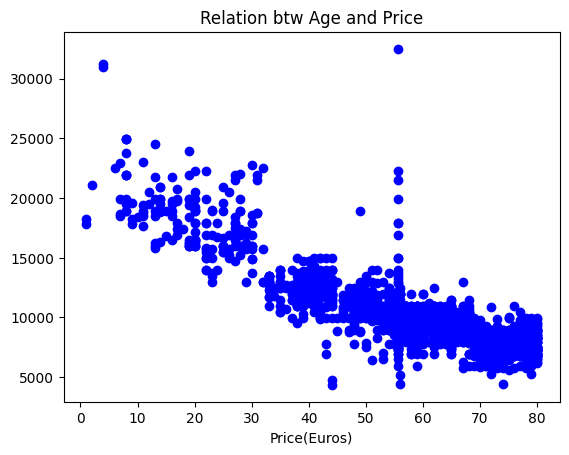

In [47]:
plt.scatter(df1["Age"],df1["Price"],c ="blue")
plt.title("Relation btw Age and Price")
plt.xlabel("Age(months)")
plt.xlabel("Price(Euros)")
plt.show()


Represnting frequency  distribution

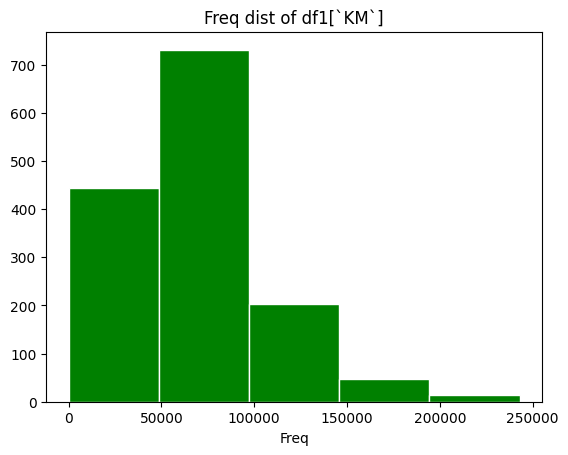

In [48]:
plt.hist(df1["KM"],color ="green",edgecolor = "white",bins = 5)
plt.title("Freq dist of df1[`KM`]")
plt.xlabel("KM")
plt.xlabel("Freq")
plt.show()

Representing the object columns category using bars which is the samevalue as their freq of occurrances 

[1277, 144, 15]
[0 1 2]


([<matplotlib.axis.XTick at 0x1aaa64d2560>,
 [Text(0, 0, 'petrol'), Text(1, 0, 'diesel'), Text(2, 0, 'CNG')])

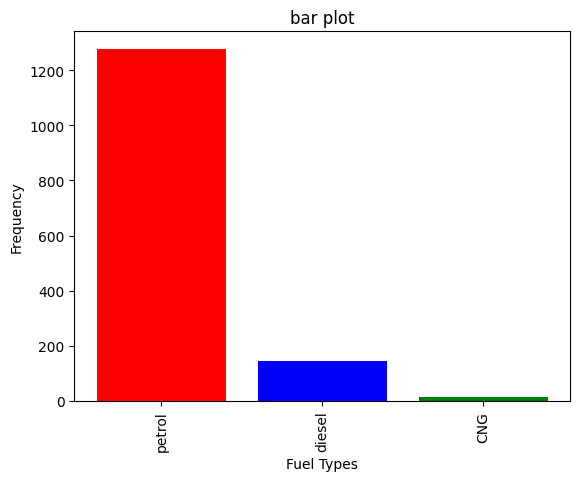

In [49]:
Count = df1["FuelType"].value_counts()
myCount = [1277 ,144,15]
print(myCount)
myLabel = ["petrol", "diesel","CNG"]
index = np.arange(len(myLabel))
print(index)


plt.bar(index , myCount , color=["red","blue","green"])
plt.title("bar plot")
plt.xlabel("Fuel Types")
plt.ylabel("Frequency")
plt.xticks(index,myLabel,rotation = 90)
